In [1]:
OUTPUT_PATH = "./out/"

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data_Nasa.csv")

In [4]:
df.head()

,Session,UserId,Round,Mental,Physical,Temporal,Performance,Effort,Frustraion
0,1,1,1,1,6,9,4,4,2
1,1,2,1,11,6,6,4,5,2
2,1,2,2,14,9,5,4,9,2
3,1,1,2,1,2,9,2,2,1
4,1,2,3,6,6,5,3,9,3


In [5]:
df["Avg"] = df.apply(lambda x: (x.Mental + x.Physical + x.Temporal + x.Performance + x.Effort + x.Frustraion)/6-1, axis= 1)
df["IsPointer"] = df.apply(lambda x: True if x.UserId % 2 == True else False, axis= 1)

In [6]:
df.groupby("Round").mean().Avg.round(1)

Round
1    5.8
2    5.6
3    5.4
Name: Avg, dtype: float64

In [7]:
df.groupby(["Round"]).Avg.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
Round,,,,,,,,
1,28.0,5.8,2.3,0.5,4.3,5.8,7.0,10.7
2,28.0,5.6,2.7,0.8,3.8,5.5,7.0,11.3
3,28.0,5.4,2.8,0.8,3.9,5.2,6.3,11.8


In [8]:
dfR = df[["UserId", "Round", 'IsPointer', "Avg"]]
f = OUTPUT_PATH + "R_NASA.csv"
dfR.to_csv(f, index=None)
f

'./out/R_NASA.csv'

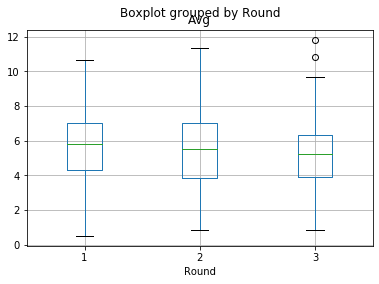

In [9]:
dfR.boxplot("Avg", by="Round")